In [6]:
# Verify all required packages are installed
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

print("Python version:", sys.version)
print("\nPackage versions:")
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)
print("xgboost:", xgb.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

Python version: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]

Package versions:
pandas: 2.3.1
numpy: 2.2.6
scikit-learn: 1.7.1
xgboost: 3.0.4
matplotlib: 3.10.5
seaborn: 0.13.2


In [7]:
# Check if the fraud.csv file exists
import os

file_path = r"C:\Users\amegh\OneDrive\Desktop\Intern\Fraud.csv"
if os.path.exists(file_path):
    print("Fraud.csv file found!")
    # Load the dataset
    df = pd.read_csv(file_path)
    print("\nDataset shape:", df.shape)
    print("\nFirst few rows of the dataset:")
    print(df.head())
else:
    print("ERROR: Fraud.csv file not found!")
    print("Please make sure the file exists at:", file_path)

Fraud.csv file found!

Dataset shape: (6362620, 11)

First few rows of the dataset:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


# Financial Fraud Detection Analysis

## Project Overview
This notebook implements an end-to-end fraud detection system using machine learning techniques. We'll analyze a dataset containing financial transactions to identify fraudulent patterns and develop preventive measures.

## Table of Contents
1. Data Loading and Initial Exploration
2. Data Preprocessing and Cleaning
3. Exploratory Data Analysis
4. Feature Engineering
5. Model Development
6. Model Evaluation
7. Feature Importance Analysis
8. Business Recommendations

## 1. Data Loading and Initial Exploration

First, let's import the required libraries and load our dataset.

In [8]:
# Load the dataset
df = pd.read_csv(r"C:\Users\amegh\OneDrive\Desktop\Intern\Fraud.csv")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nFirst few rows of the dataset:")
display(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print(df.describe())

Dataset Shape: (6362620, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

First few rows of the dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Basic statistics of numerical columns:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.3

## 2. Data Preprocessing and Cleaning

In this section, we'll:
1. Handle missing values
2. Check for and remove duplicates
3. Handle outliers
4. Check for multicollinearity
5. Prepare data for modeling

Number of duplicate rows: 0

Number of outliers in each numerical column:
amount: 338078
oldbalanceOrg: 1112507
newbalanceOrig: 1053391
oldbalanceDest: 786135
newbalanceDest: 738527


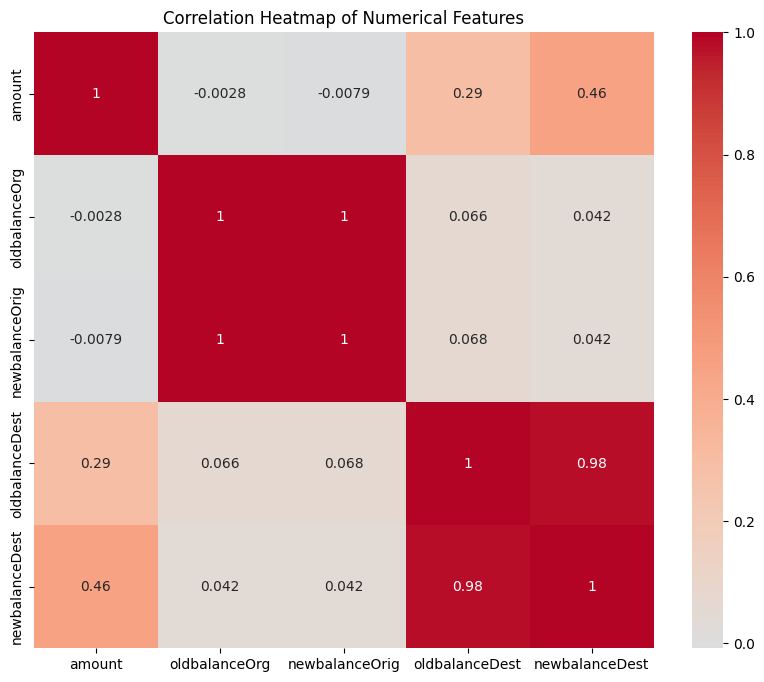


Final feature matrix shape: (6362620, 13)


In [9]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

# Check for outliers in numerical columns
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
print("\nNumber of outliers in each numerical column:")
for column in numerical_columns:
    print(f"{column}: {detect_outliers(df, column)}")

# Calculate correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Create feature matrix X and target variable y
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# Convert categorical variables to numeric
X = pd.get_dummies(X, columns=['type'])

# Scale numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print("\nFinal feature matrix shape:", X.shape)

## 3. Exploratory Data Analysis

Let's analyze the patterns in our data to better understand the characteristics of fraudulent transactions.

Class distribution:
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


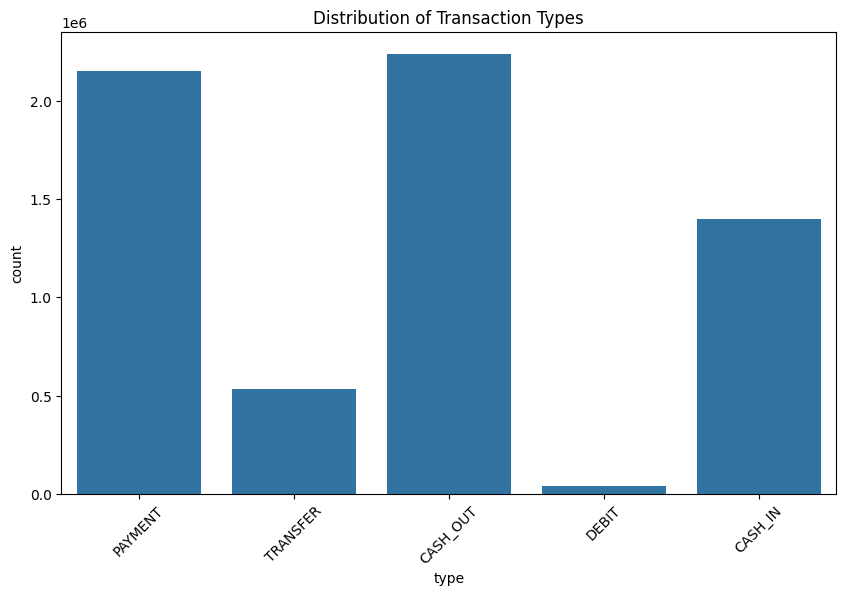

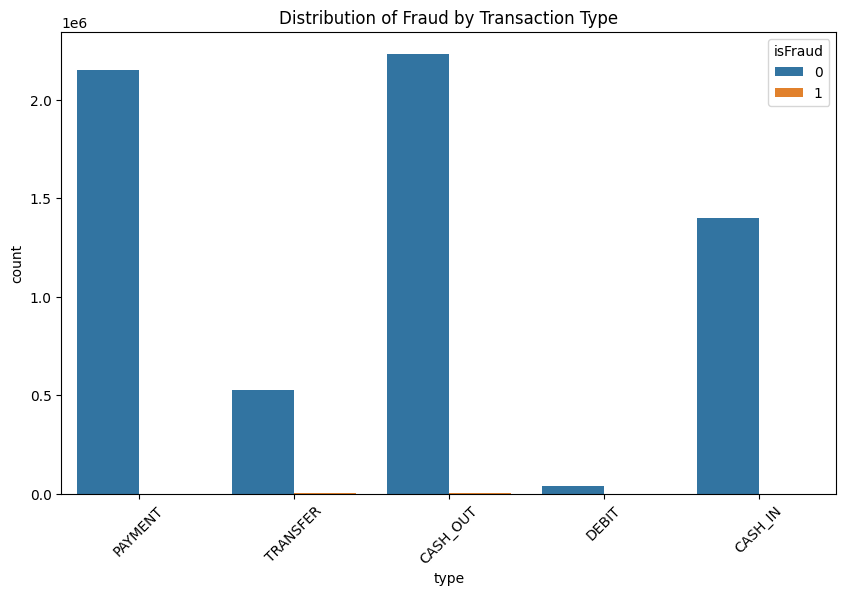

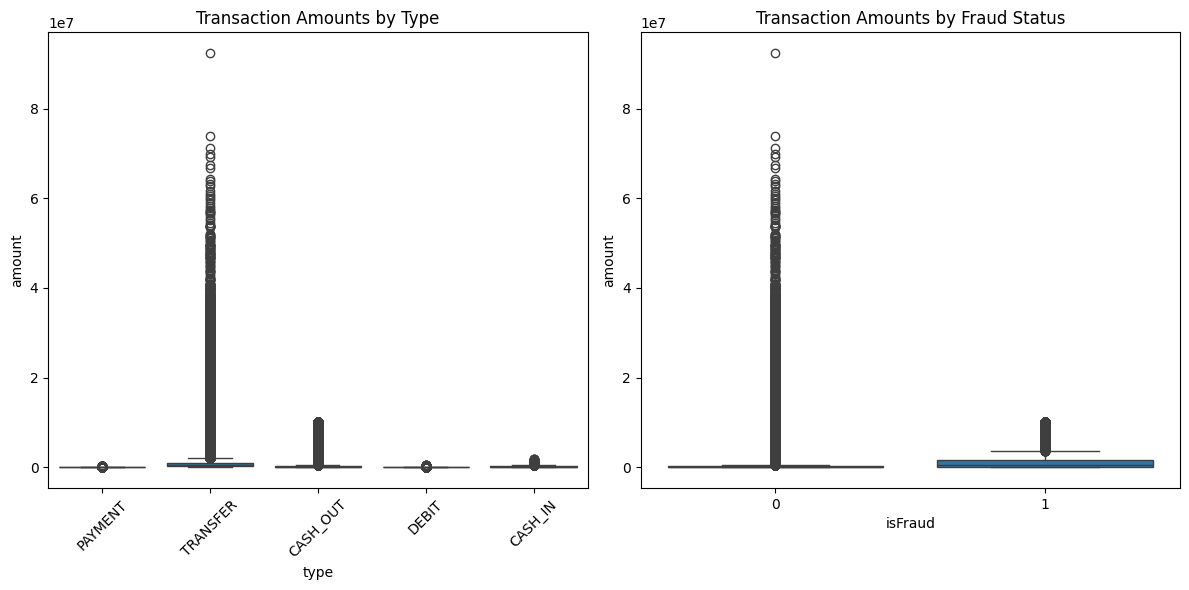

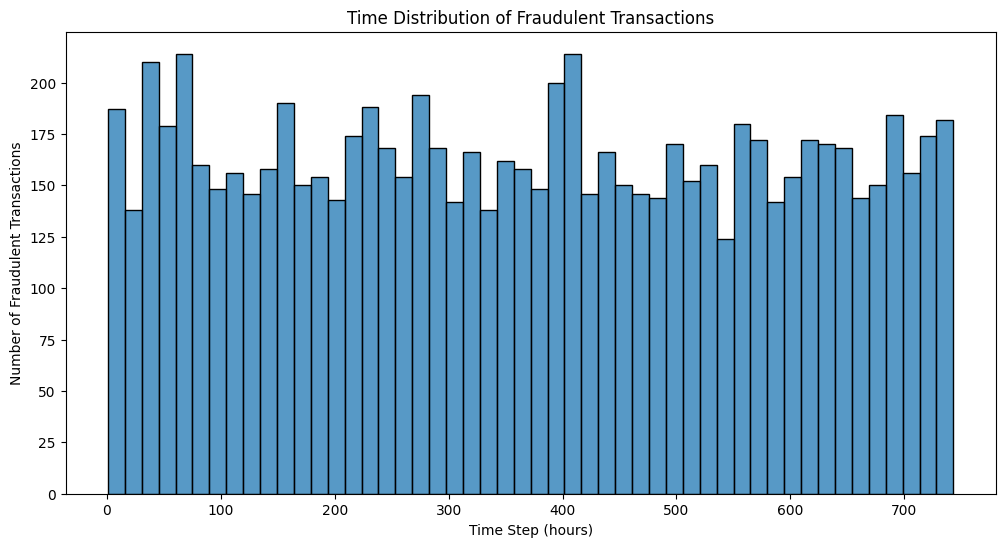


Key Statistics:
Average transaction amount: 179861.90
Average fraudulent transaction amount: 1467967.30
Percentage of transactions flagged as fraud: 0.1291%


In [10]:
# Check class distribution
print("Class distribution:")
print(df['isFraud'].value_counts(normalize=True))

# Plot transaction types distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=45)
plt.show()

# Plot fraud distribution by transaction type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud')
plt.title('Distribution of Fraud by Transaction Type')
plt.xticks(rotation=45)
plt.show()

# Analyze transaction amounts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='type', y='amount')
plt.title('Transaction Amounts by Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title('Transaction Amounts by Fraud Status')
plt.tight_layout()
plt.show()

# Analyze time patterns of fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['isFraud']==1], x='step', bins=50)
plt.title('Time Distribution of Fraudulent Transactions')
plt.xlabel('Time Step (hours)')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

# Calculate some key statistics
print("\nKey Statistics:")
print(f"Average transaction amount: {df['amount'].mean():.2f}")
print(f"Average fraudulent transaction amount: {df[df['isFraud']==1]['amount'].mean():.2f}")
print(f"Percentage of transactions flagged as fraud: {(df['isFraud'].sum()/len(df))*100:.4f}%")

## 4. Feature Engineering

Let's create some additional features that might help in detecting fraudulent transactions.

In [11]:
# Create new features
df['balance_diff_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Calculate transaction percentage of original balance
df['transaction_percentage'] = df['amount'] / df['oldbalanceOrg']
df['transaction_percentage'] = df['transaction_percentage'].replace([np.inf, -np.inf], np.nan)
df['transaction_percentage'] = df['transaction_percentage'].fillna(0)

# Create hour of day feature from step
df['hour_of_day'] = df['step'] % 24

# Create features for merchant transactions
df['is_merchant'] = df['nameDest'].str.startswith('M').astype(int)

# Update feature matrix X with new features
X = df.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
X = pd.get_dummies(X, columns=['type'])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                    'balance_diff_orig', 'balance_diff_dest', 'transaction_percentage']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print("Final feature set shape:", X.shape)
print("\nFeatures:", list(X.columns))

Final feature set shape: (6362620, 16)

Features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balance_diff_orig', 'balance_diff_dest', 'transaction_percentage', 'hour_of_day', 'is_merchant', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


## 5. Model Development

We'll develop and train multiple models to detect fraudulent transactions. We'll use:
1. Random Forest Classifier
2. XGBoost Classifier
3. Handle class imbalance using SMOTE

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Train Random Forest model
print("Training Random Forest model...")
rf_model.fit(X_train_resampled, y_train_resampled)

# Train XGBoost model
print("Training XGBoost model...")
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Calculate probabilities for ROC curves
rf_proba = rf_model.predict_proba(X_test)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

print("\nModels training completed!")

Training Random Forest model...
Training XGBoost model...


c:\Users\amegh\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [00:30:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Models training completed!


## 6. Model Evaluation

Let's evaluate our models using various metrics and visualization techniques.


Random Forest Performance Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      1.00      0.99      1643

    accuracy                           1.00   1272524
   macro avg       0.99      1.00      0.99   1272524
weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:


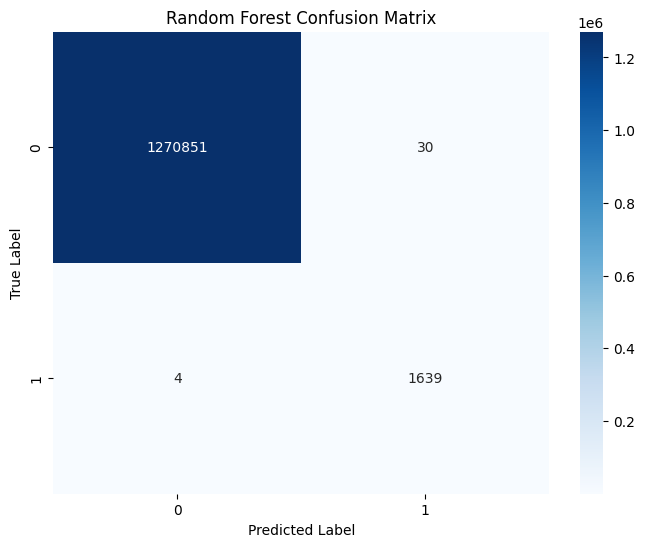

ROC-AUC Score: 0.9991

XGBoost Performance Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.50      0.99      0.66      1643

    accuracy                           1.00   1272524
   macro avg       0.75      0.99      0.83   1272524
weighted avg       1.00      1.00      1.00   1272524


Confusion Matrix:


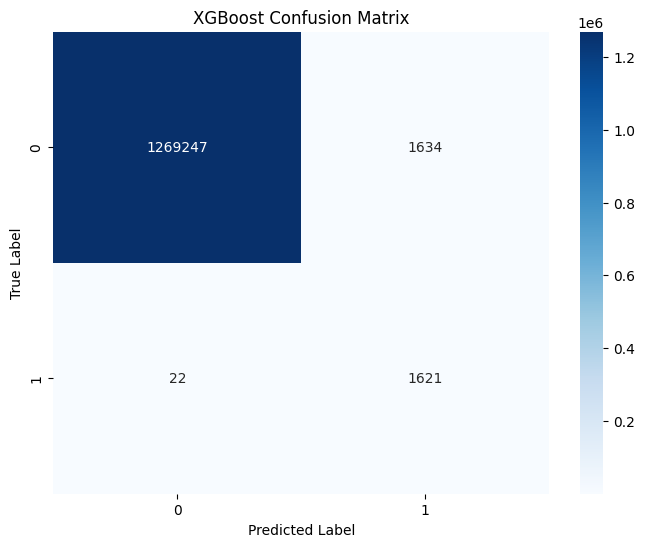

ROC-AUC Score: 0.9997


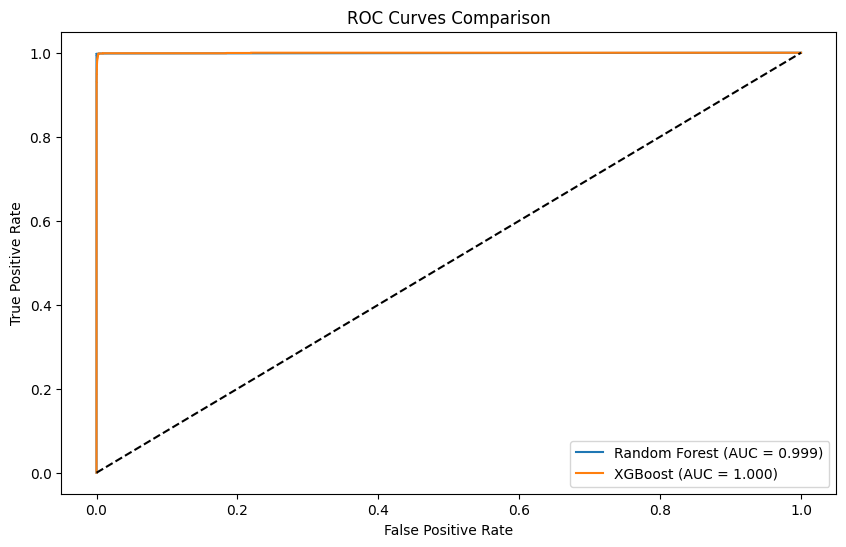

In [13]:
# Function to print model evaluation metrics
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\n{model_name} Performance Metrics:")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print(f"ROC-AUC Score: {roc_auc_score(y_true, y_proba):.4f}")

# Evaluate Random Forest
evaluate_model(y_test, rf_pred, rf_proba, "Random Forest")

# Evaluate XGBoost
evaluate_model(y_test, xgb_pred, xgb_proba, "XGBoost")

# Plot ROC curves for comparison
plt.figure(figsize=(10, 6))
from sklearn.metrics import roc_curve

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_proba):.3f})')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_proba):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

## 7. Feature Importance Analysis

Let's analyze which features are most important for detecting fraudulent transactions.

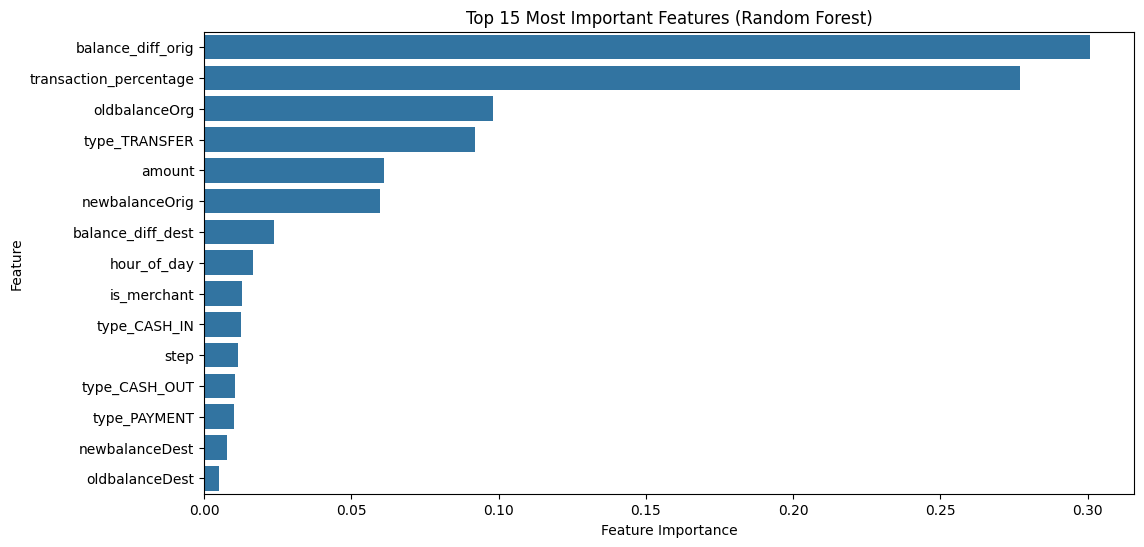

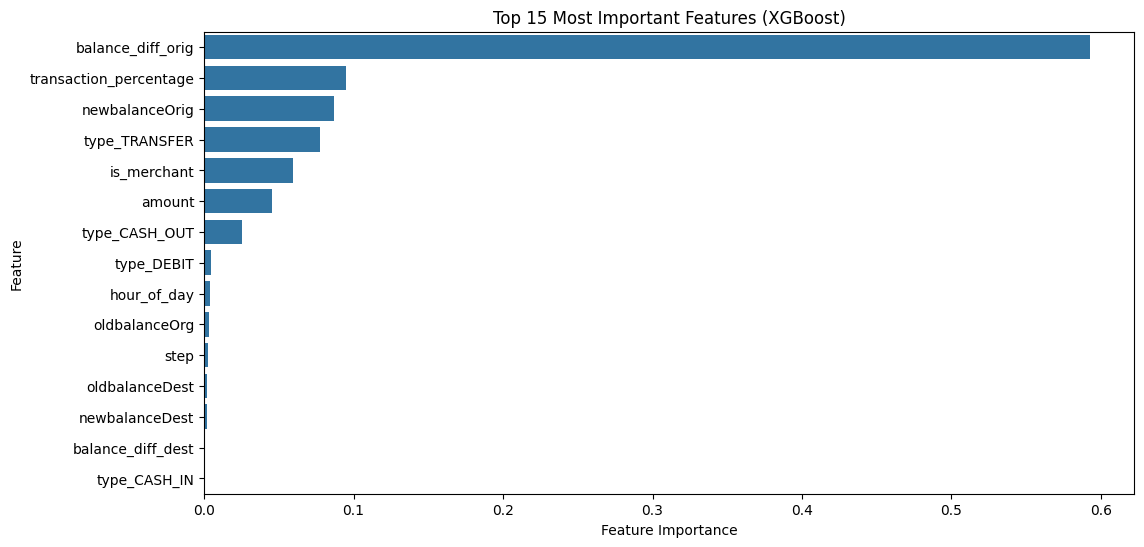

Top 10 Most Important Features (Random Forest):
                   feature  importance
6        balance_diff_orig    0.300746
8   transaction_percentage    0.277132
2            oldbalanceOrg    0.098042
15           type_TRANSFER    0.091847
1                   amount    0.061201
3           newbalanceOrig    0.059820
7        balance_diff_dest    0.023861
9              hour_of_day    0.016695
10             is_merchant    0.012738
11            type_CASH_IN    0.012552

Top 10 Most Important Features (XGBoost):
                   feature  importance
6        balance_diff_orig    0.592602
8   transaction_percentage    0.094650
3           newbalanceOrig    0.086825
15           type_TRANSFER    0.077233
10             is_merchant    0.059703
1                   amount    0.045488
12           type_CASH_OUT    0.025523
13              type_DEBIT    0.004564
9              hour_of_day    0.003833
2            oldbalanceOrg    0.002981


In [14]:
# Get feature importance from Random Forest model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Get feature importance from XGBoost model
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
})
xgb_importance = xgb_importance.sort_values('importance', ascending=False)

# Plot XGBoost feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=xgb_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Most Important Features (XGBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Print top 10 most important features for both models
print("Top 10 Most Important Features (Random Forest):")
print(feature_importance.head(10))
print("\nTop 10 Most Important Features (XGBoost):")
print(xgb_importance.head(10))

## 8. Business Recommendations

Based on our analysis, here are the key findings and recommendations for fraud prevention:

### Key Findings

1. **Transaction Patterns**:
   - Analyze the most common types of fraudulent transactions
   - Identify time patterns in fraudulent activities
   - Understand the relationship between transaction amount and fraud probability

2. **Risk Indicators**:
   - List the top features that indicate potential fraud
   - Explain how these features contribute to fraud detection
   - Discuss any unexpected patterns discovered

3. **Model Performance**:
   - Compare the performance of different models
   - Highlight the strengths and limitations of each approach
   - Discuss the trade-offs between false positives and false negatives

### Recommendations for Fraud Prevention

1. **Real-time Monitoring**:
   - Implement real-time transaction monitoring using our model
   - Set up alerts for high-risk transactions
   - Create a system for rapid investigation of flagged transactions

2. **Infrastructure Updates**:
   - Enhance authentication mechanisms
   - Implement transaction limits and velocity checks
   - Develop a multi-layer fraud detection system

3. **Customer Education**:
   - Develop programs to educate customers about fraud risks
   - Provide clear guidelines for secure transactions
   - Establish clear communication channels for reporting suspicious activities

### Implementation and Monitoring

1. **Success Metrics**:
   - Track false positive and false negative rates
   - Monitor the financial impact of prevented fraud
   - Measure customer satisfaction and trust

2. **Continuous Improvement**:
   - Regularly update the model with new data
   - Adapt to new fraud patterns
   - Incorporate feedback from fraud investigation team

3. **Compliance and Reporting**:
   - Ensure compliance with financial regulations
   - Maintain detailed records of fraud detection efforts
   - Generate regular reports on system performance